# 반갑습니다 13기 여러분

과제를 진행해 볼게요

혹시라도 도저히 모르겠거나 해결이 안되신다면 01040493041로 전화주시거나 카톡주세요!!

# ''' ? ''' 이 있는 부분을 채워주시면 됩니다

나는 내 스타일로 하겠다 하시면 그냥 구현 하셔도 됩니다!!

참고하셔야 하는 함수들은 링크 달아드렸으니 들어가서 확인해보세요

# 1) PCA의 과정을 한번 차근차근 밟아 볼거에요 잘 따라 오세요

In [1]:
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt
import pandas as pd
import random

#   기본 모듈들을 불러와 줍니다

In [2]:
x1 = [95, 91, 66, 94, 68, 63, 12, 73, 93, 51, 13, 70, 63, 63, 97, 56, 67, 96, 75, 6]
x2 = [56, 27, 25, 1, 9, 80, 92, 69, 6, 25, 83, 82, 54, 97, 66, 93, 76, 59, 94, 9]
x3 = [57, 34, 9, 79, 4, 77, 100, 42, 6, 96, 61, 66, 9, 25, 84, 46, 16, 63, 53, 30]

#   설명변수 x1, x2, x3의 값이 이렇게 있네요

In [3]:
X = np.stack((x1,x2,x3),axis=0)

#설명변수들을 하나의 행렬로 만들어 줍니다

In [4]:
X = pd.DataFrame(X.T,columns=['x1','x2','x3']) #하나의 행렬을 데이터프레임으로 만들고 각 변수의 이름을 지정해 주었습니다. 

In [5]:
X #확인해 보았을때, 정상적으로 출력되는 것을 확인 할 수 있었습니다. 

,x1,x2,x3
0,95,56,57
1,91,27,34
2,66,25,9
3,94,1,79
4,68,9,4
5,63,80,77
6,12,92,100
7,73,69,42
8,93,6,6
9,51,25,96


1-1) 먼저 PCA를 시작하기 전에 항상!!!!!! 데이터를 scaling 해주어야 해요

https://datascienceschool.net/view-notebook/f43be7d6515b48c0beb909826993c856/ 를 참고하시면 도움이 될거에요

지금까지는 train set 과 test set을 분리해주기 전에 scaling을 해주어도 상관없다고 알고 있었지만 
이번기회를 통해서 나누어 준후에 scaling을 하고 scaling한 data의 mean과 std에 맞춰서 test set을 scaling해야 한다는 사실을 알게 되었습니다. 

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X)
X_std = scaler.transform(X)
np.mean(X_std), np.std(X_std)

(7.956598343146955e-17, 1.0)

In [7]:
features = X_std.T #features라는 이름으로 지정하였습니다. 

In [8]:
features

array([[ 1.08573604,  0.93801686,  0.01477192,  1.04880625,  0.08863151,
        -0.09601747, -1.97943714,  0.2732805 ,  1.01187645, -0.53917504,
        -1.94250735,  0.16249111, -0.09601747, -0.09601747,  1.15959564,
        -0.35452606,  0.05170172,  1.12266584,  0.3471401 , -2.20101593],
       [ 0.02614175, -0.86575334, -0.92726334, -1.66538341, -1.41934339,
         0.76426183,  1.13332186,  0.42595679, -1.5116084 , -0.92726334,
         0.85652683,  0.82577183, -0.03536825,  1.28709688,  0.33369178,
         1.16407687,  0.64124181,  0.11840676,  1.19483187, -1.41934339],
       [ 0.30684189, -0.46445467, -1.30282049,  1.04460382, -1.47049366,
         0.97753455,  1.74883111, -0.1961776 , -1.40342439,  1.61469258,
         0.44098042,  0.60865359, -1.30282049, -0.76626636,  1.21227698,
        -0.06203907, -1.06807806,  0.50804969,  0.17270336, -0.5985932 ]])

1-2) 자 그럼 공분산 행렬을 구해볼게요\

https://docs.scipy.org/doc/numpy/reference/generated/numpy.cov.html 를 참고하시면 도움이 될거에요

In [9]:
cov_matrix = np.cov(features) #features에 대한 공분산 행렬을 출력하고 이를 cov_matrix라는 이름으로 저장해 보았습니다. 

In [10]:
cov_matrix

array([[ 1.05263158, -0.2037104 , -0.12079228],
       [-0.2037104 ,  1.05263158,  0.3125801 ],
       [-0.12079228,  0.3125801 ,  1.05263158]])

1-3) 이제 고유값과 고유벡터를 구해볼게요

방법은 실습코드에 있어요!!

In [11]:
#Eigenvalue
eigenvalues = (lin.eig(cov_matrix)[0])  #Eigenvalue를 확인하였습니다. 
#Eigenvector
eigenvectors = (lin.eig(cov_matrix)[1]) #Eigenvector를 확인하였습니다. 

In [12]:
print(eigenvalues)
print(eigenvectors)

[1.48756162 0.94435407 0.72597904]
[[ 0.47018528 -0.85137353 -0.23257022]
 [-0.64960236 -0.15545725 -0.74421087]
 [-0.59744671 -0.50099516  0.62614797]]


In [13]:
mat = np.zeros((3,3))

In [14]:
mat

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [15]:
mat[0][0] = eigenvalues[0]
mat[1][1] = eigenvalues[1]
mat[2][2] = eigenvalues[2]

In [16]:
mat

array([[1.48756162, 0.        , 0.        ],
       [0.        , 0.94435407, 0.        ],
       [0.        , 0.        , 0.72597904]])

1-4) 자 이제 고유값 분해를 할 모든 준비가 되었어요 고유값 분해의 곱으로 원래 공분산 행렬을 구해보세요

https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html 를 참고해서 행렬 끼리 곱하시면 됩니다

행렬 곱으로 eigenvector x mat x eigenvector.T 하면 될거에요

In [17]:
np.dot(np.dot(eigenvectors,mat),eigenvectors.T)

array([[ 1.05263158, -0.2037104 , -0.12079228],
       [-0.2037104 ,  1.05263158,  0.3125801 ],
       [-0.12079228,  0.3125801 ,  1.05263158]])

1-5) 마지막으로 고유 벡터 축으로 값을 변환해 볼게요

함수로 한번 정의해 보았어요

https://docs.scipy.org/doc/numpy/reference/generated/numpy.concatenate.html

In [18]:
def new_coordinates(X,eigenvectors):
    for i in range(eigenvectors.shape[0]):
        if i == 0:
            new = [X.dot(eigenvectors.T[i])]
        else:
            new = np.concatenate((new,[X.dot(eigenvectors.T[i])]),axis=0)
    return new.T

# 모든 고유 벡터 축으로 데이터를 projection한 값입니다

In [19]:
new_coordinates(X_std,eigenvectors)

# 새로운 축으로 변환되어 나타난 데이터들입니다

array([[ 0.31019368, -1.08215716, -0.07983642],
       [ 1.28092404, -0.43132556,  0.13533091],
       [ 1.38766381,  0.78428014, -0.12911446],
       [ 0.95087515, -1.15737142,  1.6495519 ],
       [ 1.84222365,  0.88189889,  0.11493111],
       [-1.12563709, -0.52680338,  0.06564012],
       [-2.71174416,  0.63290138,  0.71195473],
       [-0.03100441, -0.20059783, -0.50339479],
       [ 2.29618509,  0.07661447,  0.01087174],
       [-0.61585248, -0.205764  ,  1.82651199],
       [-1.73320252,  1.29971699,  0.09045178],
       [-0.82366049, -0.57164535, -0.27123176],
       [ 0.75619512,  0.73995175, -0.76710616],
       [-0.42344386,  0.26555394, -1.41533681],
       [-0.39581307, -1.64646874,  0.24104031],
       [-0.88581498,  0.15195119, -0.82271209],
       [ 0.24587691,  0.39139878, -1.15801831],
       [ 0.14741103, -1.22874561, -0.03110396],
       [-0.7161265 , -0.56781471, -0.86180345],
       [ 0.24475107,  2.39442622,  1.19337361]])

# 2) PCA를 구현해 보세요

위의 과정을 이해하셨다면 충분히 하실 수 있을거에요

In [20]:
from sklearn.preprocessing import StandardScaler

def MYPCA(X,number):
    scaler = StandardScaler() #위의 과정을 한번에 함수로 모아서 출력하도록 하였습니다. 
    scaler.fit(X)
    x_std = scaler.transform(X)
    features = x_std.T
    cov_matrix = np.cov(features)

    eigenvalues = (lin.eig(cov_matrix)[0])  
    eigenvectors = (lin.eig(cov_matrix)[1])
    
    new_coordinates(x_std,eigenvectors)
    
    new_coordinate = new_coordinates(x_std,eigenvectors)
    
    index = eigenvalues.argsort()
    index = list(index)
    
    for i in range(number):
        if i==0:
            new = [new_coordinate[:,index.index(i)]]
        else:
            new = np.concatenate(([new_coordinate[:,index.index(i)]],new),axis=0)
    return new.T

In [21]:
MYPCA(X,3) #기존의 값과 동일하게 출력되는 것을 확인할수 있었습니다. 

# 새로운 축으로 잘 변환되어서 나타나나요?
# 위에서 했던 PCA랑은 차이가 있을 수 있어요 왜냐하면 위에서는 고유값이 큰 축 순서로 정렬을 안했었거든요

array([[ 0.31019368, -1.08215716, -0.07983642],
       [ 1.28092404, -0.43132556,  0.13533091],
       [ 1.38766381,  0.78428014, -0.12911446],
       [ 0.95087515, -1.15737142,  1.6495519 ],
       [ 1.84222365,  0.88189889,  0.11493111],
       [-1.12563709, -0.52680338,  0.06564012],
       [-2.71174416,  0.63290138,  0.71195473],
       [-0.03100441, -0.20059783, -0.50339479],
       [ 2.29618509,  0.07661447,  0.01087174],
       [-0.61585248, -0.205764  ,  1.82651199],
       [-1.73320252,  1.29971699,  0.09045178],
       [-0.82366049, -0.57164535, -0.27123176],
       [ 0.75619512,  0.73995175, -0.76710616],
       [-0.42344386,  0.26555394, -1.41533681],
       [-0.39581307, -1.64646874,  0.24104031],
       [-0.88581498,  0.15195119, -0.82271209],
       [ 0.24587691,  0.39139878, -1.15801831],
       [ 0.14741103, -1.22874561, -0.03110396],
       [-0.7161265 , -0.56781471, -0.86180345],
       [ 0.24475107,  2.39442622,  1.19337361]])

# 3) sklearn이랑 비교를 해볼까요?

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html 를 참고하시면 도움이 될거에요

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X)
X_std = scaler.transform(X)
np.mean(X_std), np.std(X_std)

(7.956598343146955e-17, 1.0)

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(X_std) #X_std에 대해서 pca 기법을 fit 하였습니다. 

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [24]:
pca.fit_transform(X_std) #동일하게 출력되는 것을 확인할 수 있습니다. 

array([[-0.31019368, -1.08215716, -0.07983642],
       [-1.28092404, -0.43132556,  0.13533091],
       [-1.38766381,  0.78428014, -0.12911446],
       [-0.95087515, -1.15737142,  1.6495519 ],
       [-1.84222365,  0.88189889,  0.11493111],
       [ 1.12563709, -0.52680338,  0.06564012],
       [ 2.71174416,  0.63290138,  0.71195473],
       [ 0.03100441, -0.20059783, -0.50339479],
       [-2.29618509,  0.07661447,  0.01087174],
       [ 0.61585248, -0.205764  ,  1.82651199],
       [ 1.73320252,  1.29971699,  0.09045178],
       [ 0.82366049, -0.57164535, -0.27123176],
       [-0.75619512,  0.73995175, -0.76710616],
       [ 0.42344386,  0.26555394, -1.41533681],
       [ 0.39581307, -1.64646874,  0.24104031],
       [ 0.88581498,  0.15195119, -0.82271209],
       [-0.24587691,  0.39139878, -1.15801831],
       [-0.14741103, -1.22874561, -0.03110396],
       [ 0.7161265 , -0.56781471, -0.86180345],
       [-0.24475107,  2.39442622,  1.19337361]])

In [25]:
MYPCA(X,3) #동일하게 출력되는 것을 확인할 수 있습니다. 

array([[ 0.31019368, -1.08215716, -0.07983642],
       [ 1.28092404, -0.43132556,  0.13533091],
       [ 1.38766381,  0.78428014, -0.12911446],
       [ 0.95087515, -1.15737142,  1.6495519 ],
       [ 1.84222365,  0.88189889,  0.11493111],
       [-1.12563709, -0.52680338,  0.06564012],
       [-2.71174416,  0.63290138,  0.71195473],
       [-0.03100441, -0.20059783, -0.50339479],
       [ 2.29618509,  0.07661447,  0.01087174],
       [-0.61585248, -0.205764  ,  1.82651199],
       [-1.73320252,  1.29971699,  0.09045178],
       [-0.82366049, -0.57164535, -0.27123176],
       [ 0.75619512,  0.73995175, -0.76710616],
       [-0.42344386,  0.26555394, -1.41533681],
       [-0.39581307, -1.64646874,  0.24104031],
       [-0.88581498,  0.15195119, -0.82271209],
       [ 0.24587691,  0.39139878, -1.15801831],
       [ 0.14741103, -1.22874561, -0.03110396],
       [-0.7161265 , -0.56781471, -0.86180345],
       [ 0.24475107,  2.39442622,  1.19337361]])

# 4) MNIST data에 적용을 해볼게요!

mnist data를 따로 내려받지 않게 압축파일에 같이 두었어요~!!!

mnist-original.mat 파일과 같은 위치에서 주피터 노트북을 열어주세요~!!!

In [3]:
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_openml #정상적으로 import되지않아서 fetch_openml로 변경하여 실행하였습니다. 
from scipy import io
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

# mnist 손글씨 데이터를 불러옵니다

In [4]:
mnist = io.loadmat('mnist-original.mat') 
X = mnist['data'].T
y = mnist['label'].T #data를 불러오고 data와 label을 분리하였습니다. 

In [28]:
# data information

# 7만개의 작은 숫자 이미지
# 행 열이 반대로 되어있음 -> 전치
# grayscale 28x28 pixel = 784 feature
# 각 picel은 0~255의 값
# label = 1~10 label이 총 10개인거에 주목하자

In [29]:
# data를 각 픽셀에 이름붙여 표현
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df.head() #784개의 columns으로 구성된 data라는 것을 확인할 수 있었습니다 .

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
# df에 라벨 y를 붙여서 데이터프레임 생성
df['y'] = y

In [31]:
df #y를 추가하게 되어 785개의 컬럼을 확인할 수 있습니다.

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0


# 지금까지 배운 여러 머신러닝 기법들이 있을거에요

4-1) train_test_split을 통해 데이터를 0.8 0.2의 비율로 분할 해 주시고요

4-2) PCA를 이용하여 mnist data를 축소해서 학습을 해주세요 / test error가 제일 작으신 분께 상품을 드리겠습니다 ^0^

특정한 틀 없이 자유롭게 하시면 됩니다!!!!!!!!!

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
#요구사항대로 trian과 test를 0.8대 0.2의 비율로 나누어주었습니다. 

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
#standardScaler를 활용하여 train에 대해서 X_train_std라는 이름으로 스케일링을 진행하였스비낟. 

In [34]:
X_test_std = scaler.transform(X_test) #test에 대해서도 fit한 data를 토대로 transform하였습니다. 

In [35]:
from sklearn.decomposition import PCA
pca = PCA(n_components=470)
pca.fit(X_train_std) #X_train_std를 pca를 통하여 fit하였습니다. 

PCA(copy=True, iterated_power='auto', n_components=470, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [36]:
print(pca.explained_variance_)
#eigen values를 확인할 수 있습니다. 

[40.79126759 29.1610896  26.91195357 20.78202951 18.1265541  15.74719981
 13.80325716 12.4749181  10.99234444  9.99763657  9.65704882  8.6160301
  7.99829153  7.79509686  7.35102872  7.14385972  6.66492286  6.62815177
  6.3588304   6.22214089  5.93176291  5.74328602  5.50595347  5.33688702
  5.14875046  4.9489205   4.90648785  4.69014576  4.52389137  4.38846671
  4.29568813  4.24031998  4.08997746  3.99430044  3.9663075   3.85200693
  3.80101647  3.70909128  3.64692884  3.52018058  3.44986404  3.36472857
  3.31414925  3.25453899  3.23382113  3.18037299  3.1639647   3.15289345
  3.08442304  3.01151454  2.94478551  2.91780083  2.85411907  2.82761969
  2.80021556  2.74983469  2.70206747  2.66864323  2.60393731  2.58210254
  2.53624037  2.50933483  2.48585987  2.46789678  2.44929477  2.38529875
  2.36509088  2.31810705  2.27690461  2.26273164  2.24340925  2.22148615
  2.20734524  2.17562546  2.14658754  2.13511425  2.10996869  2.09742617
  2.07393307  2.05916292  2.02600775  2.0219905   2.

In [37]:
X_train_std_pca = pca.fit_transform(X_train_std) #trian에 대해서 pca를 진행하였습니다. 

In [38]:
print("original shape: ",X_train_std.shape)

original shape:  (56000, 784)


In [39]:
print("transformed shape:", X_train_std_pca.shape) #원래는 70~80%의 비율을 맞추고 싶었지만 시간문제상 60%의 비율로 PCA를 진행하였습니다ㅠ

transformed shape: (56000, 470)


In [40]:
X_test_pca = pca.transform(X_test_std)

In [41]:
print("original shape: ", X_test_std.shape)

original shape:  (14000, 784)


In [42]:
print("transformed shape: ", X_test_pca.shape)

transformed shape:  (14000, 470)


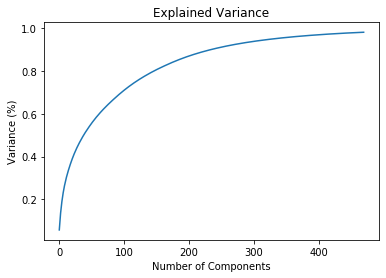

In [43]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') 
plt.title('Explained Variance')
plt.show()

# KNN

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid = {
    'n_neighbors' : [3,5,7,9,10,11,13,15,17,19],
    'weights' : ['uniform','distance'],
    'metric' : ['euclidean', 'manhattan'] 
}

grid_search = GridSearchCV(
    KNeighborsClassifier(),
    param_grid,
    verbose = 1,
    cv = 3,
    n_jobs = -1
)
#PCA를 진행한 data에 대해서 grid Search를 통하여 적절한 KNN의 파라미터를 찾아보도록 하였습니다. 

In [45]:
gs_results = grid_search.fit(X_train_std_pca,y_train) #train set에 대해서 grid search를 진행하였습니다.  (10시간....)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 132.9min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 399.9min finished
C:\Users\gjwjd\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [46]:
print("가장 좋은 결과를 얻는 그리드 : {}".format(gs_results.best_params_))
print("Best Cross-validatiy Score는 : {}".format(gs_results.best_score_))
print("test에 대해 grid_seach 알고리즘을 적용하면 : {}".format(gs_results.score(X_test_pca,y_test)))

가장 좋은 결과를 얻는 그리드 : {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Best Cross-validatiy Score는 : 0.944875015271239
test에 대해 grid_seach 알고리즘을 적용하면 : 0.9509285714285715


grid search 결과 가장 좋은 결과를 얻는 그리드는 metric: euclidean, n_neighbors: 3, weights: distance로 출력되었습니다. 
Best Cross-Validatiy Score는 약 0.945
test에 대하여 grid_search 알고리즘을 적용한 결과 0.95라는 만족스러운 결과가 나타나게 되었습니다. 